In [5]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd

# tres important
from sklearn.metrics import confusion_matrix, classification_report

from matplotlib import pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
# from mlxtend.plotting import plot_decision_regions
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import MaxPool2D, Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.layers import Dense, Flatten
from keras.models import Sequential

import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model


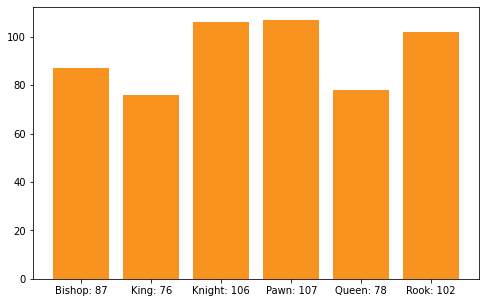

In [6]:
dirname = 'Chessman-image-dataset/Chess'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]

chess_dic = {}
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))

label_list = ["{}: {}".format(key, chess_dic[key]) for key in chess_dic]

plt.figure(figsize=(8, 5))
plt.bar(range(len(chess_dic)), list(chess_dic.values()), color="#f7931e")
plt.xticks(range(len(chess_dic)), list(label_list))
plt.show()

In [7]:
img_height = 300
img_width = 300

data_train = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)
input_shape = (img_height, img_width, 3)
batch_size = 16

train_generator = data_train.flow_from_directory(
    dirname,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=8)

validation_generator = data_train.flow_from_directory(
    dirname,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [8]:
model = Sequential([
    Conv2D(16, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')

])

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [10]:
history = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator)

C:\Users\theoe\AppData\Local\Temp\ipykernel_11680\1497875069.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator)


Epoch 1/25
25/25 [==============================] - 70s 3s/step - loss: 2.5936 - accuracy: 0.1671 - val_loss: 1.7871 - val_accuracy: 0.1914
Epoch 2/25
25/25 [==============================] - 52s 2s/step - loss: 1.7839 - accuracy: 0.1799 - val_loss: 1.7839 - val_accuracy: 0.1852
Epoch 3/25
25/25 [==============================] - 60s 2s/step - loss: 1.7840 - accuracy: 0.1902 - val_loss: 1.7832 - val_accuracy: 0.2160
Epoch 4/25
25/25 [==============================] - 52s 2s/step - loss: 1.7753 - accuracy: 0.2185 - val_loss: 1.7806 - val_accuracy: 0.2037
Epoch 5/25
25/25 [==============================] - 53s 2s/step - loss: 1.7667 - accuracy: 0.2314 - val_loss: 1.7792 - val_accuracy: 0.1852
Epoch 6/25
25/25 [==============================] - 58s 2s/step - loss: 1.7678 - accuracy: 0.2288 - val_loss: 1.7798 - val_accuracy: 0.2160
Epoch 7/25
25/25 [==============================] - 73s 3s/step - loss: 1.7574 - accuracy: 0.2031 - val_loss: 1.7771 - val_accuracy: 0.1852
Epoch 8/25
25/25 [==

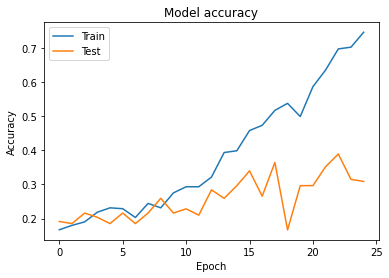

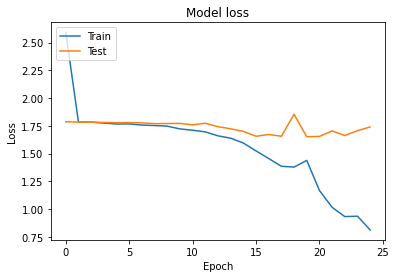

C:\Users\theoe\AppData\Local\Temp\ipykernel_11680\3543285070.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(


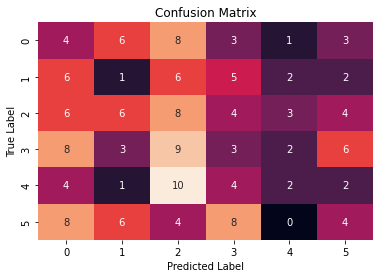


Classification Report
              precision    recall  f1-score   support

      Bishop       0.11      0.16      0.13        25
        King       0.04      0.05      0.04        22
        Rook       0.18      0.26      0.21        31
        Pawn       0.11      0.10      0.10        31
       Queen       0.20      0.09      0.12        23
      Knight       0.19      0.13      0.16        30

    accuracy                           0.14       162
   macro avg       0.14      0.13      0.13       162
weighted avg       0.14      0.14      0.13       162



In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

num_of_test_samples = 162
Y_pred = model.predict_generator(
    validation_generator, 
    num_of_test_samples // batch_size + 1
    )
y_pred = np.argmax(Y_pred, axis=1)
matrix1 = confusion_matrix(validation_generator.classes, y_pred)


sns.heatmap(matrix1, annot=True, cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification Report')
target_names = ['Bishop',
                'King',
                'Rook',
                'Pawn',
                'Queen',
                'Knight']
class_report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(class_report)

# Inception

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [13]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [14]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                       

In [15]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [16]:
last_layer = pre_trained_model.get_layer('mixed7')
last_layer.output
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output
last_output

last layer output shape: (None, 7, 7, 768)


<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [17]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)


# Configure and compile the model
inputs = pre_trained_model.input
model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

c:\Users\theoe\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                              

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './Chessman-image-dataset-inception/train', # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        './Chessman-image-dataset-inception/test',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')


Found 551 images belonging to 6 classes.
Found 119 images belonging to 6 classes.


In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=150,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2)

Epoch 1/150
20/20 - 35s - loss: -1.6052e+02 - acc: 0.1432 - val_loss: -2.5080e+02 - val_acc: 0.1700 - 35s/epoch - 2s/step
Epoch 2/150
20/20 - 22s - loss: -4.0003e+02 - acc: 0.1432 - val_loss: -4.7521e+02 - val_acc: 0.1700 - 22s/epoch - 1s/step
Epoch 3/150
20/20 - 20s - loss: -6.3482e+02 - acc: 0.1176 - val_loss: -6.7592e+02 - val_acc: 0.1800 - 20s/epoch - 1s/step
Epoch 4/150
20/20 - 20s - loss: -9.0771e+02 - acc: 0.1304 - val_loss: -9.6673e+02 - val_acc: 0.1700 - 20s/epoch - 1s/step
Epoch 5/150
20/20 - 20s - loss: -1.2505e+03 - acc: 0.1253 - val_loss: -1.1818e+03 - val_acc: 0.1500 - 20s/epoch - 1s/step
Epoch 6/150
20/20 - 26s - loss: -1.5892e+03 - acc: 0.1250 - val_loss: -1.4196e+03 - val_acc: 0.1900 - 26s/epoch - 1s/step
Epoch 7/150
20/20 - 24s - loss: -1.9070e+03 - acc: 0.1250 - val_loss: -1.7979e+03 - val_acc: 0.1900 - 24s/epoch - 1s/step
Epoch 8/150
20/20 - 24s - loss: -2.0567e+03 - acc: 0.1355 - val_loss: -2.0569e+03 - val_acc: 0.1500 - 24s/epoch - 1s/step
Epoch 9/150
20/20 - 26s 

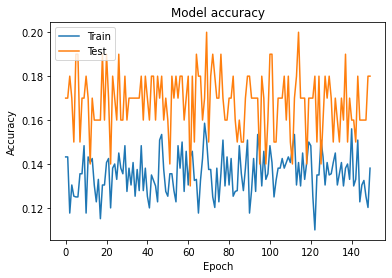

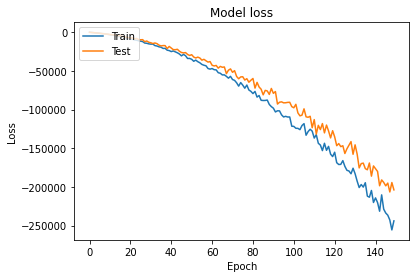

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
from tensorflow.keras.optimizers import SGD

# unfreeze = False

# Unfreeze all models after "mixed6"
# for layer in pre_trained_model.layers:
#   if unfreeze:
#     layer.trainable = True
#   if layer.name == 'mixed6':
#     unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

c:\Users\theoe\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

C:\Users\theoe\AppData\Local\Temp\ipykernel_11680\1198879305.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/150
20/20 - 19s - loss: -6.7946e+05 - acc: 0.1355 - val_loss: -1.3007e+06 - val_acc: 0.1600 - 19s/epoch - 958ms/step
Epoch 2/150
20/20 - 14s - loss: -2.3379e+06 - acc: 0.1407 - val_loss: -2.8982e+06 - val_acc: 0.1300 - 14s/epoch - 711ms/step
Epoch 3/150
20/20 - 15s - loss: -4.2842e+06 - acc: 0.1350 - val_loss: -4.2851e+06 - val_acc: 0.1800 - 15s/epoch - 748ms/step
Epoch 4/150
20/20 - 15s - loss: -6.5521e+06 - acc: 0.1458 - val_loss: -7.0249e+06 - val_acc: 0.1500 - 15s/epoch - 736ms/step
Epoch 5/150
20/20 - 15s - loss: -9.2998e+06 - acc: 0.1279 - val_loss: -9.6698e+06 - val_acc: 0.1700 - 15s/epoch - 729ms/step
Epoch 6/150
20/20 - 14s - loss: -1.2656e+07 - acc: 0.1407 - val_loss: -1.2644e+07 - val_acc: 0.1700 - 14s/epoch - 714ms/step
Epoch 7/150
20/20 - 15s - loss: -1.6833e+07 - acc: 0.1432 - val_loss: -1.6988e+07 - val_acc: 0.1800 - 15s/epoch - 734ms/step
Epoch 8/150
20/20 - 15s - loss: -2.0858e+07 - acc: 0.1407 - val_loss: -2.0656e+07 - val_acc: 0.1800 - 15s/epoch - 734ms/step


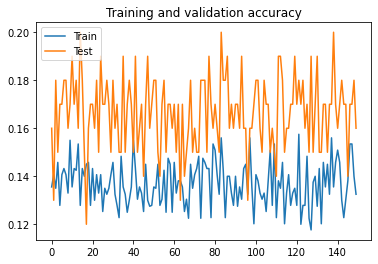

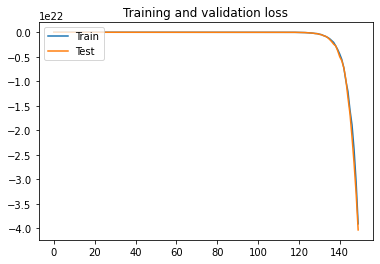

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['Train', 'Test'], loc='upper left')